#Project15-To perfom EDA and train the machine to interpret/prdict the miles per gallon a car will travel depends on various varibales 

In [153]:
#Importing some neccessary libraries# Checking datatypes of each variables
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [37]:
df_auto=pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',delim_whitespace=True)
df_auto

,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


We have to add/define column name to make the data set easy to understand

In [38]:
#Adding/defining column for our data set
df_auto.columns=['Miles_per_Gallon','cylinders','displacement','horsepower','weight','acceleration',
                 'model_year','origin','car_name']

In [39]:
df_auto.head()

,Miles_per_Gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [40]:
df_auto.shape

(397, 9)

In [41]:
#Checking for null values
df_auto.isnull().sum()

Miles_per_Gallon    0
cylinders           0
displacement        0
horsepower          0
weight              0
acceleration        0
model_year          0
origin              0
car_name            0
dtype: int64

We can see that there is no null values present , our data is clean

In [42]:
#Checking description of dataset
df_auto.describe()

,Miles_per_Gallon,cylinders,displacement,weight,acceleration,model_year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


We can see all minimum,maximum,mean values for different-different parameters

In [43]:
#Checking for data types
df_auto.dtypes

Miles_per_Gallon    float64
cylinders             int64
displacement        float64
horsepower           object
weight              float64
acceleration        float64
model_year            int64
origin                int64
car_name             object
dtype: object

--Performing EDA for the above data to get insight of data--

In [50]:
#Sorting values by Miles per Gallon
df_auto.sort_values(by='Miles_per_Gallon')

,Miles_per_Gallon,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
27,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
24,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250
25,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
26,11.0,8,318.0,210.0,4382.0,13.5,70,1,dodge d200
102,11.0,8,400.0,150.0,4997.0,14.0,73,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
325,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
324,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
328,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl


In [51]:
#Plotting a pivot table for model year and miles per gallon to see average mpg vlaues for year wise models of cars
pd.pivot_table(df_auto,index=['model_year'],values=['Miles_per_Gallon'])

,Miles_per_Gallon
model_year,
70,17.678571
71,21.250000
72,18.714286
73,17.100000
74,22.703704
75,20.266667
76,21.573529
77,23.375000
78,24.061111


By this Pivot Table we can see that mean value of Miles per Gallon increases and impoved by years

In [56]:
pd.pivot_table(df_auto, index=['model_year'],values=['Miles_per_Gallon','cylinders'])

,Miles_per_Gallon,cylinders
model_year,,
70,17.678571,6.714286
71,21.250000,5.571429
72,18.714286,5.821429
73,17.100000,6.375000
74,22.703704,5.259259
75,20.266667,5.600000
76,21.573529,5.647059
77,23.375000,5.464286
78,24.061111,5.361111


We can see that miles per hours and number of cylinders are inversely proportional to each other

In [57]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

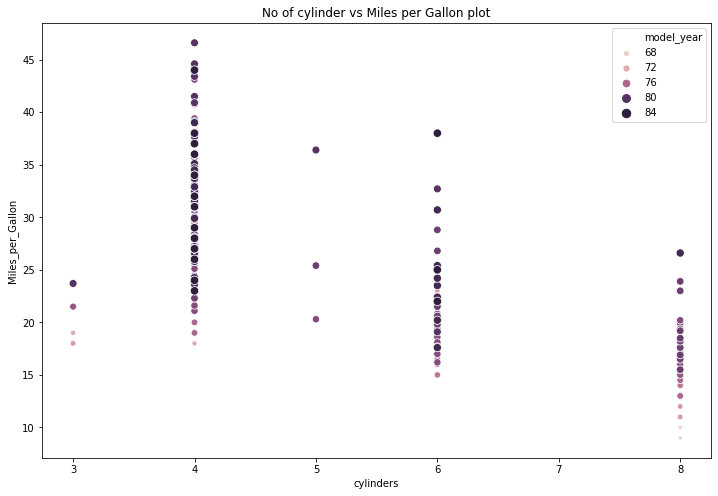

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cylinders',y='Miles_per_Gallon',hue='model_year',size='model_year',data=df_auto)
plt.title('No of cylinder vs Miles per Gallon plot')
plt.show()

We can see that we have developed better technology with time and 4 no. are cylinder are ideal to get maximum miles per gallon of gas/fuel

In [65]:
df_auto.car_name.sort_values()

95     amc ambassador brougham
8           amc ambassador dpl
65          amc ambassador sst
256                amc concord
314                amc concord
                ...           
393                  vw pickup
308                  vw rabbit
196                  vw rabbit
324       vw rabbit c (diesel)
292           vw rabbit custom
Name: car_name, Length: 397, dtype: object

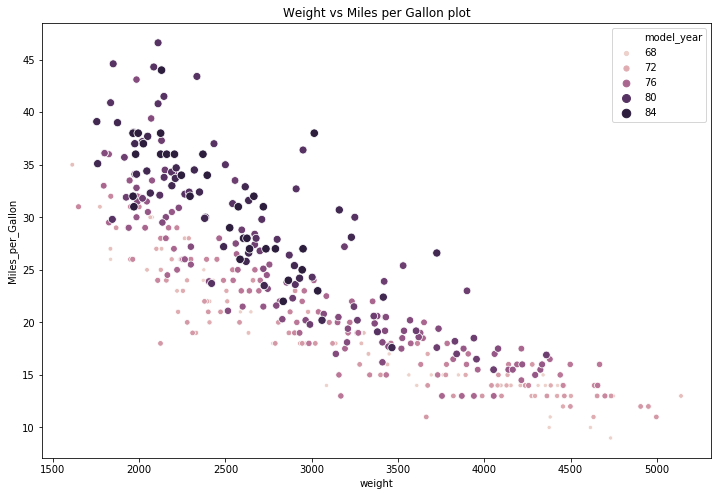

In [83]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='weight',y='Miles_per_Gallon',hue='model_year',size='model_year',data=df_auto)
plt.title('Weight vs Miles per Gallon plot')
plt.show()

We can see that reducing in weight impoves the car miles per gallon average over year

In [111]:
#On inspection we found some missing values "?" in horse power, we have to drop those values
df_auto=df_auto[df_auto.horsepower != '?']

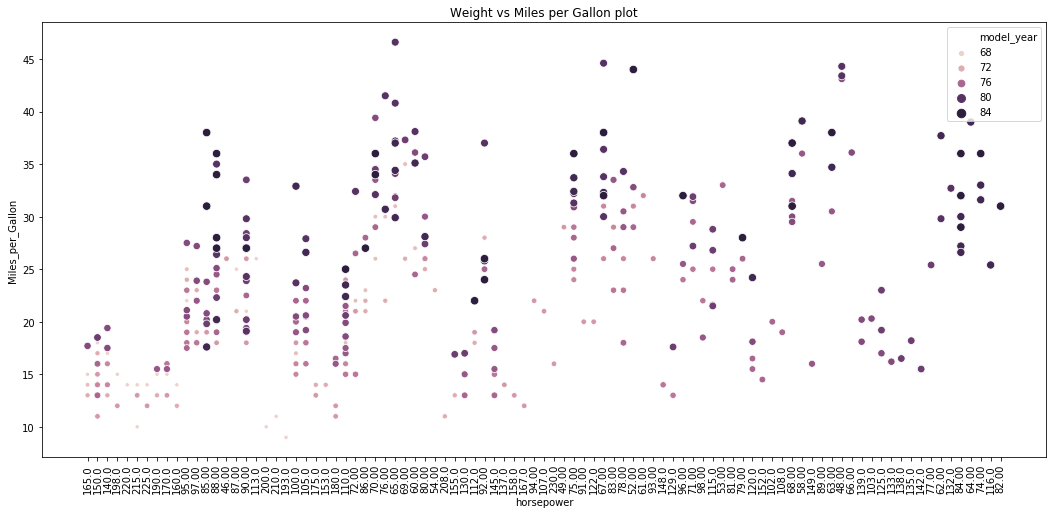

In [97]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='horsepower',y='Miles_per_Gallon',hue='model_year',size='model_year',data=df_auto)
plt.title('Weight vs Miles per Gallon plot')
plt.xticks(rotation=90)
plt.show()

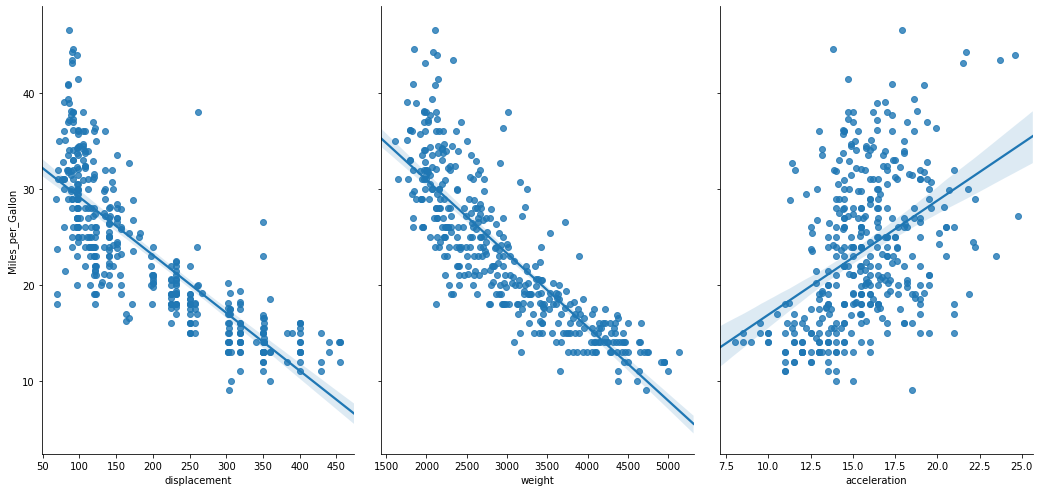

In [91]:
sns.pairplot(x_vars=['displacement', 'weight', 'acceleration'], y_vars='Miles_per_Gallon', size=7, aspect=0.7, kind='reg',data=df_auto)
plt.show()

We can see by this regression plot that displacemetn and weight parameters have linear realtion with Miles per gallon

In [116]:
#Since we have object datatypes in our data we have to encode them using Label Encoder
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
list=['horsepower','car_name']
for val in list:
    df_auto[val]=LE.fit_transform(df_auto[val].astype(str))

In [123]:
df_auto.dtypes

Miles_per_Gallon    float64
cylinders             int64
displacement        float64
horsepower            int32
weight              float64
acceleration        float64
model_year            int64
origin                int64
car_name              int32
dtype: object

We can see that now we have only float and int datatypes , which we need to train our model

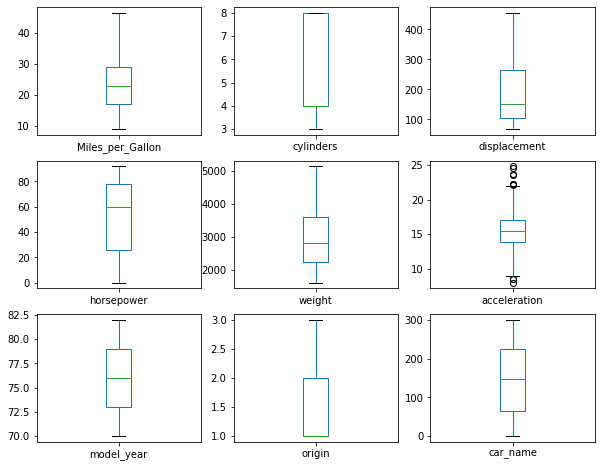

In [127]:
#Checking for outliers
df_auto.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,8))
plt.show()

In [126]:
#Removing outliers using zscore
from scipy.stats import zscore
z_score=np.abs(zscore(df_auto))
z_score

array([[1.08457703, 1.49004531, 1.49179888, ..., 1.63291787, 0.7180286 ,
        1.26342   ],
       [0.69996827, 1.49004531, 1.18554534, ..., 1.63291787, 0.7180286 ,
        0.92900909],
       [0.95637411, 1.49004531, 1.05155942, ..., 1.63291787, 0.7180286 ,
        1.51204598],
       ...,
       [1.09487261, 0.86154991, 0.56584209, ..., 1.63570442, 0.7180286 ,
        0.32542198],
       [0.58206093, 0.86154991, 0.70939844, ..., 1.63570442, 0.7180286 ,
        0.11532407],
       [0.96666969, 0.86154991, 0.71896886, ..., 1.63570442, 0.7180286 ,
        0.89048103]])

In [133]:
print(df_auto.shape)
auto=df_auto[(z_score<3).all(axis=1)]
print(auto.shape)

(391, 9)
(389, 9)


We can see that outliers are removed

In [130]:
#Separating the input and ouput variable
df_x=auto.drop(columns=['Miles_per_Gallon'])
y=auto['Miles_per_Gallon']

In [134]:
#Checking for skewness in data
print(df_x.skew())
print('Total no. of features are:', len(df_x.skew()))
print('Skewed features are: ',len(df_x.skew().loc[abs(df_x.skew())>0.5]))

cylinders       0.506410
displacement    0.701552
horsepower     -0.310233
weight          0.521401
acceleration    0.161820
model_year      0.024863
origin          0.918233
car_name        0.016483
dtype: float64
Total no. of features are: 8
Skewed features are:  4


In [135]:
#Removing skewness
for index in df_x.skew().index:
    if df_x.skew().loc[index] > 0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index] <-0.5:
        df_x[index]=np.square(df_x[index])

In [136]:
#Again Checking for skewness
print(df_x.skew())
print('Total no of features are : ', len(df_x.skew()))
print('No of skewed features are : ',len(df_x.skew().loc[abs(df_x.skew())>0.5]))

cylinders       0.371500
displacement    0.212812
horsepower     -0.310233
weight          0.151420
acceleration    0.161820
model_year      0.024863
origin          0.796163
car_name        0.016483
dtype: float64
Total no of features are :  8
No of skewed features are :  1


We can see that only 1 skewed element is left

In [140]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [141]:
#Again Checking for skewness
print(x.skew())
print('Total no of features are : ', len(x.skew()))
print('No of skewed features are : ',len(x.skew().loc[abs(x.skew())>0.5]))

cylinders       0.371500
displacement    0.212812
horsepower     -0.310233
weight          0.151420
acceleration    0.161820
model_year      0.024863
origin          0.796163
car_name        0.016483
dtype: float64
Total no of features are :  8
No of skewed features are :  1


#In this data set we can see that there is linear/continuos data for dependable variable(Miles_per_gallon) hence we use regression method to train and predict the variables

In [142]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [143]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [144]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR

In [146]:
LR=LinearRegression()
maxr2_score(LR,x,y)

max r2 score is :  0.9018735431964928 corresponding to random state:  93


In [147]:
DT=DecisionTreeRegressor()
maxr2_score(DT,x,y)

max r2 score is :  0.8568341002186453 corresponding to random state:  77


In [149]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,y)

max r2 score is :  0.909989935115858 corresponding to random state:  93


In [150]:
RF=RandomForestRegressor()
maxr2_score(RF,x,y)

max r2 score is :  0.9463181075518854 corresponding to random state:  93


We can see that maximum r2 score we are getting from Ensemble Technique Random Forest

In [155]:
# Checking cross validation score for Random Forest
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(RF,x,y,cv=5,scoring="r2")
print("Mean r2 score: ",cross_score.mean())
print("standard deviation in r2 score for regressor: ",cross_score.std())
print(cross_score)

Mean r2 score:  0.742148121604991
standard deviation in r2 score for regressor:  0.21461060928085704
[0.91107778 0.83319077 0.86611995 0.77863504 0.32171707]


In [167]:
#Saving our final model using Random Forest Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=93,test_size=0.20)
RF.fit(train_x,train_y)
pred=RF.predict(test_x)

In [158]:
#Finding RMSE and Mean absolute error for our final model
print("RMSE is: ",np.sqrt(mean_squared_error(test_y,pred)))
print('Mean Absolute error: ', mean_absolute_error(test_y,pred))

RMSE is:  2.1885488869954983
Mean Absolute error:  1.693846153846155


Text(0, 0.5, 'Predicted Y')

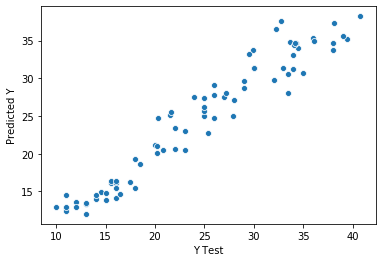

In [185]:
sns.scatterplot(x=test_y,y=pred,legend='full')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can see the linear realation between Y test and Predicted Y

In [186]:
#Saving final model using joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.externals import joblib 
  

joblib.dump(RF, 'RF_auto-mpg.pkl')

['RF_auto-mpg.pkl']

**This is the best and final model we have saved**